# Blood Alcohol Module

## Overview

<p> The data for this project is from <em> Calculus & Mathematica </em> by Bill Davis, William Davis, Horacio Porta, and J. Jerry Uhl. It was published in 1994 by Addison Wesley Longman Inc. I accessed it through <em> A Course in Mathematical Modeling </em> by Douglas D. Mooney and Randall Swift, published by The Mathematical Association of America, 1999. </p>
<p> From <em> A Course in Mathematical Modeling </em>:
    <li> the average human body eliminates 12 grams of alcohol per hour. </li>
    <li> An average college age male in good shape weighing K kilograms has about .68K liters
        of fluid in his body. </li>
    <li>A college-age female in good shape weighing K kilograms has
         about .65K liters of fluid in her body. </li>
</p>
For now, we will consider the following drinks: 

| type of drink | grams of alchohol |
| :- | :- |
| beer | 13.6 |
| light | 11.3 |
| wine | 10.9 |
| vodka | 16.7 |
| bourbon | 13.4 |

## Helper Functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# the human body expells 0.12 grams of alcohol per minute
def elimination_rate(x):
    return  x - 0.2

In [3]:
"""
function body_fluid_l
returns the amound of body fluid in a person in litres
inputs:
    gender : 'm' or 'f'
    weight : in pounds
output:
    body fluid (L)
"""

def body_fluid_l(gender, weight):
    # differing body fluid proportions by gender
    if gender == 'm':
        factor = 0.68
    else:
        factor = 0.65
    return (weight / 2.2046) * factor * 10

In [4]:
"""
function BAC()
calculates the Blood Alcohol Level (BAC)
inputs:
    N-steps : number of recursions
    fluid_l : body fluid amount of invidual, litres
    alcohol : a list of the drinks taken
    time    : a list of drinking intervals, minutes
output:
    BAC level array
"""

# our alcohol options and their respective grams of alcohol
alcohol_dict = {'beer' : 13.6, 
                'light': 11.3,
                'wine' : 10.9, 
                'vodka' : 16.7, 
                'bourbon' : 13.4}

def BAC(N_steps, fluid_l, alcohol, time):
    # select our keys and values 
    if alcohol in alcohol_dict.keys():
        global alcohol_grams
        alcohol_grams = alcohol_dict.get(alcohol)
    else:
        return 'this alcohol is not in the starting dictionary'
    
    # run our recurrence
    x0 = alcohol_grams
    X = run_recurrence(elimination_rate, alcohol_grams, N_steps, time)
    
    return X / fluid_l

In [5]:
"""
function run_recurrence
Runs the recurrence relation defined by x(n+1) = f(x(n))
inputs:
    f : our reccurence relation
    x0: the initial state of the recurrence relation
    N_steps: the number of steps you want to run your recurrence.
    time : the drinking intervals
output:
    X : a large array containing all computed steps. X[k] is the kth step of the recurrence.
"""

def run_recurrence(f,x0,N_steps, time, *args):
    x0 = np.array(x0) 
    # initializing X
    X = np.empty((N_steps+1,*x0.shape)) 
    X[0] = x0 
    for i in range(1,N_steps+1):
        if i in time:
            # grams of alcohol per drink
            X[i] = X[i-1] + alcohol_grams 
        else:
            # looping through our recurrence relation
            X[i]=f(X[i-1],*args)
    return X

In [6]:
"""
function alcohol_plot()
plots blood alcohol level (BAC) over time
inputs:
    X : our BAC level array
output:
    a plot of BAC level
"""
def pos(lst):
    # returning only positive BAC levels
    return [x for x in lst if x > 0] or None 

def alcohol_plot(X):
    
    X = pos(X)
    plot_ = sns.lineplot(x = np.arange(len(X)),y = X, linewidth = 3)
    
    plot_.set_xticks(range(0, len(X), 60))
    plot_.set_xticklabels(range(0, len(X), 60))
                
        
    plt.xlabel('minutes passed')
    plt.ylabel('alcohol concentration')
    plt.title('blood alcohol concentration vs time')
    
    # adding legal BAC level, CA
    plt.axhline(y = 0.08, color = "orange", 
                label = "0.08 gm / 100 ml", linewidth = 3)
    
    plt.legend(loc = "upper right")
    plt.ylim(0)
    plt.ylim(0)
    sns.set(rc={"figure.figsize":(9, 6)})
    sns.set_style('white')
    plt.show()

In [7]:
"""
function BAC_analysis
this bad boy puts it all together!
inputs:
    gender  : 'm' or 'f'
    weight  : in pounds
    alcohol : type of alcohol, pulled from starting dictionary
    time    : a list of time when the invidual drinks
output:
    our analysis!
"""


def BAC_analysis(gender, weight, alcohol, time):
    fluid_l = body_fluid_l(gender, weight)
    levels = BAC(N_steps = 800, fluid_l = fluid_l, alcohol = alcohol, time = time)
    
    legal = len(levels[levels >= 0.08])
    
    print(f'This individual has a body fluid level of {round(fluid_l, 2)} litres.') 
    print(f'They have drank {len(time)} amounts of {alcohol}, '
          f'which is {len(time) * int(alcohol_grams)} grams of alcohol.')
    print(f'They will have a BAC over the legal blood alcohol level for {legal} minutes.')
    alcohol_plot(X = levels)

## Examples

This individual has a body fluid level of 462.67 litres.
They have drank 6 amounts of beer, which is 78 grams of alcohol.
They will have a BAC over the legal blood alcohol level for 199 minutes.


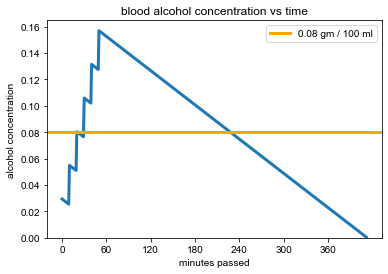

In [8]:
drink_time = [0, 10, 20, 30, 40, 50]
BAC_analysis(gender = 'm', weight = 150, alcohol = 'beer', time = drink_time)

This individual has a body fluid level of 353.81 litres.
They have drank 6 amounts of vodka, which is 96 grams of alcohol.
They will have a BAC over the legal blood alcohol level for 352 minutes.


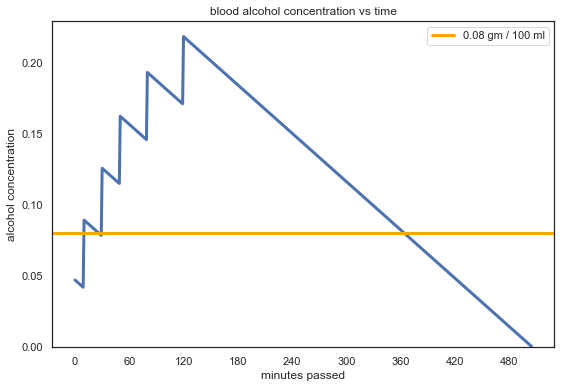

In [9]:
drink_time = [0, 10, 30, 50, 80, 120]
BAC_analysis(gender = 'f', weight = 120, alcohol = 'vodka', time = drink_time)

## Overview

<p> It is important to drink safely. An individual should know their tolerance level, drink water often, take ample time before drinks, sleep, and more. Binge drinking can lead to many preventable problems, either health or socially related. This project was a great introduction to BAC analysis and I hope that it can help educate others! </p>
<p> One assumption of this model is that the individual is a healthy college student. If I were to expand on this project, it would be great to write helper functions to calculate different alcohol explellation rates based on factors such as age.</p>
<p> This model also has a limited number of alcoholic drinks available. I hope that users can add new drinks to the alcohol dictionary if they would like.</p>  
<p> This is also a discrete time model. Maybe one day I can make this into a continuous time model.</p>
<p> I once again want to credit <em> Calculus & Mathematica </em> by Bill Davis, William Davis, Horacio Porta, and J. Jerry Uhl, published in 1994 by Addison Wesley Longman Inc. I and accessed in <em> A Course in Mathematical Modeling </em> by Douglas D. Mooney and Randall Swift, published by The Mathematical Association of America, 1999. Please check out these textbooks, their projects are amazing.</p>